In [2]:
import pandas as pd

## Classes

Váriveis que possuem várias classes em texto é necessário converte-las parao formato binário (True/Fase), onde se a variavel pertence a uma classe especifica ela será 1, caso contrário será 0.

In [3]:
df = pd.read_csv('traffic-collision-data-from-2010-to-present.csv')

df.shape

df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,13,Newton,1385,997,TRAFFIC COLLISION,NaN,...,STREET,SAN PEDRO ST,SLAUSON AV,"{'longitude': '-118.2696', 'human_address': '{...",22352,786.0,858.0,7.0,13.0,46.0
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,20,Olympic,2054,997,TRAFFIC COLLISION,NaN,...,STREET,OLYMPIC BL,KINGSLEY AV,"{'longitude': '-118.3031', 'human_address': '{...",22723,617.0,646.0,NaN,12.0,89.0
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,16,Foothill,1669,997,TRAFFIC COLLISION,NaN,...,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD,"{'longitude': '-118.2704', 'human_address': '{...",3222,5.0,227.0,NaN,1.0,7.0
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,18,Southeast,1802,997,TRAFFIC COLLISION,0605,...,STREET,88TH ST,MAIN ST,"{'longitude': '-118.2739', 'human_address': '{...",22352,800.0,358.0,7.0,14.0,45.0
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,16,Foothill,1689,997,TRAFFIC COLLISION,NaN,...,STREET,CROCKETT,SUNLAND,"{'longitude': '-118.3703', 'human_address': '{...",19335,166.0,272.0,NaN,3.0,21.0


In [4]:
area_encode = pd.get_dummies(df['Area Name']).astype(int)
area_encode.head()

,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
concatenado = pd.concat([df, area_encode], axis=1)
concatenado.drop('Area Name', axis = 1, inplace = True)

concatenado.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,13,1385,997,TRAFFIC COLLISION,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,20,2054,997,TRAFFIC COLLISION,NaN,40.0,...,1,0,0,0,0,0,0,0,0,0
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,16,1669,997,TRAFFIC COLLISION,NaN,18.0,...,0,0,0,0,0,0,0,0,0,0
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,18,1802,997,TRAFFIC COLLISION,0605,23.0,...,0,0,0,1,0,0,0,0,0,0
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,16,1689,997,TRAFFIC COLLISION,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


## Outliers

Outiliers são valores fora da curva padrão dos dados analisados, geralmente definimos ela como o valor que está longe (módulo) da média dos dados em duas vezes o desvio padrão. Um boxplot é um gráfico que divide os dados do conjunto por quartis, usando a mediana, onde é possível identificar outliers de forma fácil. Eles são representados por pontos pretos acima ou abaixo dos limites superior e inferior.

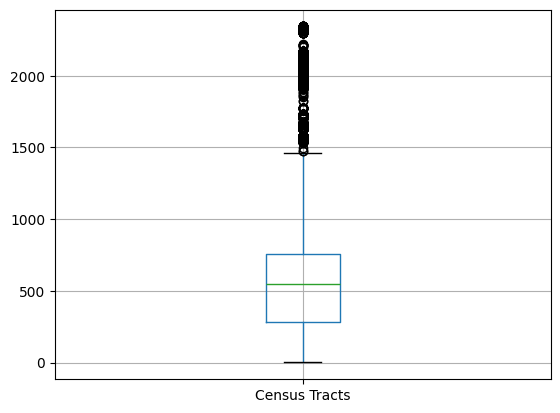

In [24]:
import matplotlib.pyplot as plt
concatenado.boxplot(column = 'Census Tracts')
plt.show(block=False)

## Qui-Quadrado

A seleção de variáveis utilizando o teste Qui-Quadrado (chi-square) é uma técnica comum em machine learning para identificar as características mais relevantes em um conjunto de dados. Quanto maoir o valor Qui-Quadrado de determinada váriavel, mais relevante ela é para explicar a váriavel resposta.

 $$ \chi^2 = \sum \frac{{(O_{ij} - E_{ij})^2}}{{E_{ij}}} $$

onde:

-  $O_{ij}$  são as frequências observadas em cada célula da tabela de contingência,
-  $E_{ij}$  são as frequências esperadas em cada célula, calculadas assumindo independência entre as variáveis.

Importante destacar que o Qui-Quadrado não suporta valores negativos devido ao valor esperado no denominador, além de que seu calculo requer a frequência dos dados e eles não podem ser negativos.


In [25]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris = load_iris()
x_iris = pd.DataFrame(iris.data, columns= [iris.feature_names])
y_iris = pd.Series(iris.target)

x_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# Escolhendo as duas varáveis mais importantes considerando maoir qui-quadrado
algoritmo = SelectKBest(score_func= chi2, k=2) 

dados_melhores_pred = algoritmo.fit(x_iris,y_iris)

print('Scores:', algoritmo.scores_)
print('Colunas: \n', algoritmo.get_support(indices=True)+1)

Scores: [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
Colunas: 
 [3 4]


## F-Value


A seleção de características utilizando o valor F é um método comum em estatística e aprendizado de máquina para avaliar a relevância das características em um conjunto de dados. O F-Value é frequentemente usado no contexto de análise de variância (ANOVA) para comparar as médias de diferentes grupos. Quanto maior o F-Value mais importante ela é pra explicar a váriavel resposta.

 $$ F = \frac{{\text{{SQD}} / (m - 1)}}{{\text{{SQE}} / (m \times (m - 1) )}}$$

 - SQD: Soma dos Quadrados de Dentro
 - SQE: Soma dos Quadrados Externos

In [27]:
from sklearn.feature_selection import f_classif

# Escolhendo as duas varáveis mais importantes considerando maoir f-value
algoritmo_f = SelectKBest(score_func= f_classif, k=2) 

dados_melhores_pred_f = algoritmo_f.fit(x_iris,y_iris)

print('Scores:', algoritmo_f.scores_)
print('Colunas: \n', algoritmo_f.get_support(indices=True)+1)

Scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
Colunas: 
 [3 4]


## Recursive Feature Elimination (RFE)

Calcula o indice especifico do modelo para todas as váriaveis e elimina aquela que teve o pior desempenho, e isso é feito recusivamente até eliminar a quantidade de váriaveis desejada.

In [31]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
# Dados Admissão de Alunos
df_adm = pd.read_csv('C:/GIT/Data_Science/01_Regressao_linear/Admission_Predict.csv')

df_admiss = (df_adm.drop(['Serial No.'], axis='columns')).copy()

x_admiss = df_admiss.loc[:, df_admiss.columns != 'Chance of Admit ']
y_admiss = df_admiss.loc[:, df_admiss.columns == 'Chance of Admit ']

In [33]:
# Modelo Machine Learning
modelo_ridge = Ridge()

#RFE
rfe = RFE(estimator = modelo_ridge, n_features_to_select=5)
fit = rfe.fit(x_admiss,y_admiss)

# Mostrando Resultados:
print('Número de atributos:',fit.n_features_)
print('Atributos Selecionados:',fit.support_)
print('Ranking dos atributos:',fit.ranking_)

Número de atributos: 5
Atributos Selecionados: [False  True  True False  True  True  True]
Ranking dos atributos: [3 1 1 2 1 1 1]
